In [ ]:
问题 D（ICM）
风能与太阳能电站
来自可再生能源的电力生产，特别是风能和太阳能，在许多国家迅速增加。这些能源源于其环保效益和低成本的优势，因此越来越受欢迎。然而，这也带来了一个重大挑战：它们的发电输出高度波动且难以控制。这种波动性成为将这些能源纳入现有电网的主要障碍。为了促进风能和太阳能发电设施与传统电网的融合，必须解决发电波动性带来的问题，包括系统平衡、储备管理和发电单元的调度。因此，需要制定预测和调控方法，帮助公用事业公司和研究人员预测短期和长期时间尺度上的风速和太阳辐射。
任务：
提供的数据集包括来自一个风电场的12个风力涡轮机和一个太阳能电场的11个太阳能电站的一个月发电数据。目标是开发一个有效的数学模型来解决以下任务：
1.	分别研究风电场和太阳能电场发电的波动模式。在总发电量出现显著下降（至少提前5分钟）或显著增加（至少提前2分钟）时，应做出预测。
设当前时刻的功率为p，过去30分钟的平均功率为q。波动幅度由k = |p − q|/q来衡量。当k超过指定阈值t时，定义为显著的下降或增加。你可以选择t的值，
目标是使得t尽可能小，同时提高预测的准确性。
2.	由于数据以1Hz的频率记录，你需要分别为接下来的1至120秒的功率生成进行间隔预测。
3.	一些发电站采用一种策略，即保持备用发电机在储备中，当发电量减少时启用，发电量增加时停用。目标是设计一个调度方案，使得波动强度以概率r保持在指定阈值t以下，同时确定作为备用单位的总发电机的比例，并决定何时激活或停用它们。你可以选择t和r的值，目标是使得t尽可能小，同时r尽可能大。

supplement_S1.txt 数据格式
该文件提供了传感器的坐标信息和每个传感器的太阳辐射数据。

Supplement_W1_velocity.txt 数据格式
该文件包含每个风机在不同时间点的风速数据。

Supplement_W1_power.txt 数据格式
该文件记录了每个风机在不同时间点的功率输出。


任务 1：风电场与太阳能电场发电波动模式研究
目标：
•	分析风电场和太阳能电场的发电波动模式。
•	在发电量出现显著下降或增加时提前预测，阈值 k = |p − q| / q 超过指定的 t 时，定义为显著的波动。
•	在总发电量出现显著下降（至少提前5分钟）或显著增加（至少提前2分钟）时进行预测。
步骤与思路：
1.	数据预处理：
o	将给定的1Hz频率的时间序列数据进行清洗、去除异常值或缺失值。比如使用插值法填补缺失值。
o	根据时间戳对数据进行排序，以确保时间序列的连续性。
•  波动幅度计算：
2.	设定当前时刻的功率为 p，过去30分钟的平均功率为 q。
3.	根据公式 k = |p − q| / q 计算每个时刻的波动幅度。
4.	使用滑动窗口方法计算过去30分钟的平均功率 q。可以选择窗口大小为30分钟，使用滑动平均或加权平均。
阈值选择与调整：
•	对于每个时刻的波动幅度 k，如果超过阈值 t，则认为是显著的波动（即显著下降或增加）。
•	通过实验选择合适的阈值 t。t 的选择要基于历史数据的波动情况，目标是使得 t 尽可能小，同时提高预测的准确性。
o	可以通过交叉验证的方法调节 t 的值，寻找最佳的阈值，使得预测的准确性最大化。
•	波动预测模型设计：
o	基于历史数据，使用机器学习或时间序列预测方法来进行波动预测。常用的模型包括：
	ARIMA (AutoRegressive Integrated Moving Average)：适合于平稳时间序列数据，通过自回归和滑动平均结合的方法预测未来波动。
	LSTM (Long Short-Term Memory)：适用于处理时间序列数据，能够捕捉长期依赖关系，尤其是在数据中存在较大波动时表现良好。
	SVR (Support Vector Regression)：通过非线性回归对时间序列进行拟合，可以适应复杂的波动模式。
•	提前预测：
o	针对波动的显著增加或减少，设定提前预测的时间窗口：对于增加的波动提前 2分钟，对于减少的波动提前 5分钟。
o	训练模型时使用过去的数据来预测未来的波动强度，并在设定的时间窗口内做出预测。
•	性能评估：
o	使用 MSE (Mean Squared Error)、MAE (Mean Absolute Error) 和 R-squared 来评估模型的预测精度。
o	可以通过混淆矩阵和准确率来评价显著波动预测的准确度。





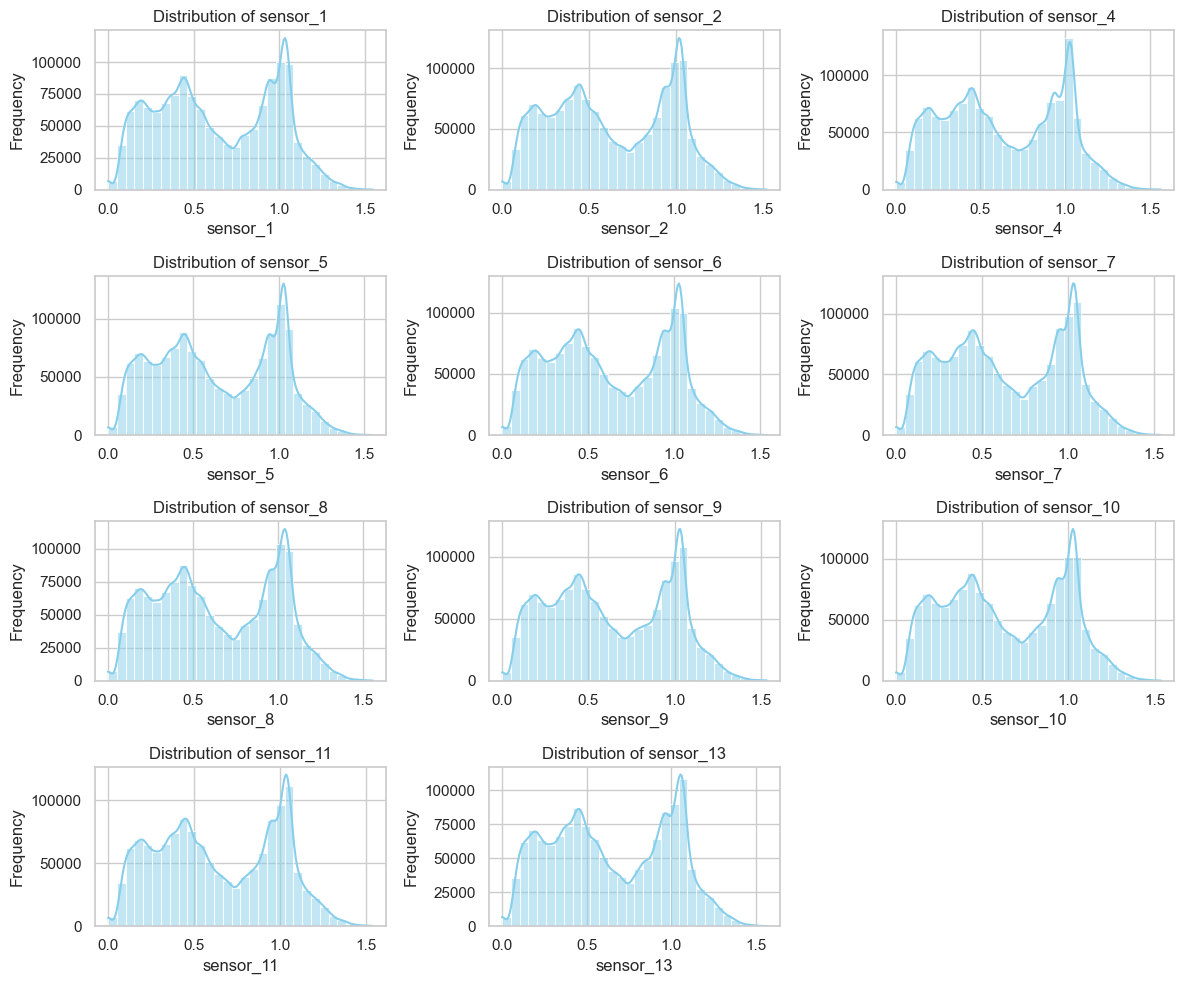

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
file_path = 'supplement_S1.txt'  # 设置数据文件的路径
data = pd.read_csv(file_path, sep=' ', header=0)  # 读取文件，使用空格作为分隔符，header=0表示第一行作为列名

# 填充缺失值为0
data.fillna(0, inplace=True)  # 用0填充数据中的缺失值，inplace=True表示直接在原数据上修改


# 设置绘图风格
sns.set(style="whitegrid")  # 设置Seaborn的绘图风格为白色网格背景

# 创建一个图形和子图
plt.figure(figsize=(12, 10))  # 创建一个12x10的画布

# 绘制每一列的分布图
for i, column in enumerate(data.columns[1:], start=1):  # 遍历数据的所有列（跳过第一列时间戳列），i表示列的索引
    plt.subplot(4, 3, i)  # 创建4行3列的子图矩阵，第i个子图
    sns.histplot(data[column], kde=True, color="skyblue", bins=30)  # 绘制柱状图和核密度估计（kde），颜色为天蓝色，设置30个柱
    plt.title(f'Distribution of {column}')  # 设置子图的标题为当前列名
    plt.xlabel(column)  # 设置x轴标签为当前列名
    plt.ylabel('Frequency')  # 设置y轴标签为频率

# 自动调整子图布局
plt.tight_layout()  # 自动调整子图之间的间距，使得图形不重叠
plt.show()  # 显示绘制的图形



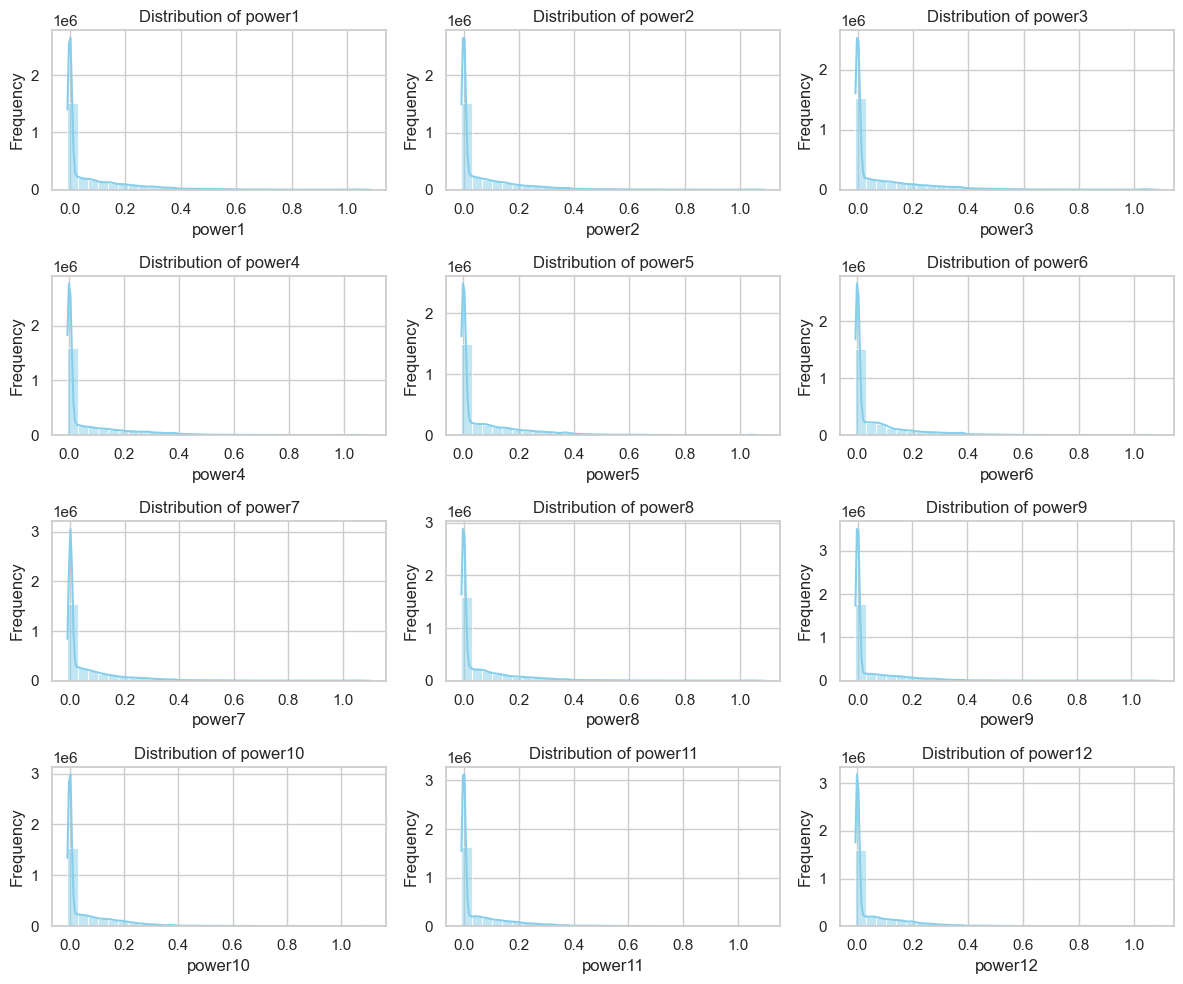

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
file_path = 'Supplement_W1_power.txt'
data = pd.read_csv(file_path, sep=' ', header=0)

# 填充缺失值为0
data.fillna(0, inplace=True)

# 设置绘图风格
sns.set(style="whitegrid")

# 创建一个图形和子图
plt.figure(figsize=(12, 10))

# 绘制每一列的分布图
for i, column in enumerate(data.columns[1:], start=1):  # 从第2列开始（跳过时间戳列）
    plt.subplot(4, 3, i)  # 创建4x3的子图
    sns.histplot(data[column], kde=True, color="skyblue", bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# 自动调整子图布局
plt.tight_layout()
plt.show()

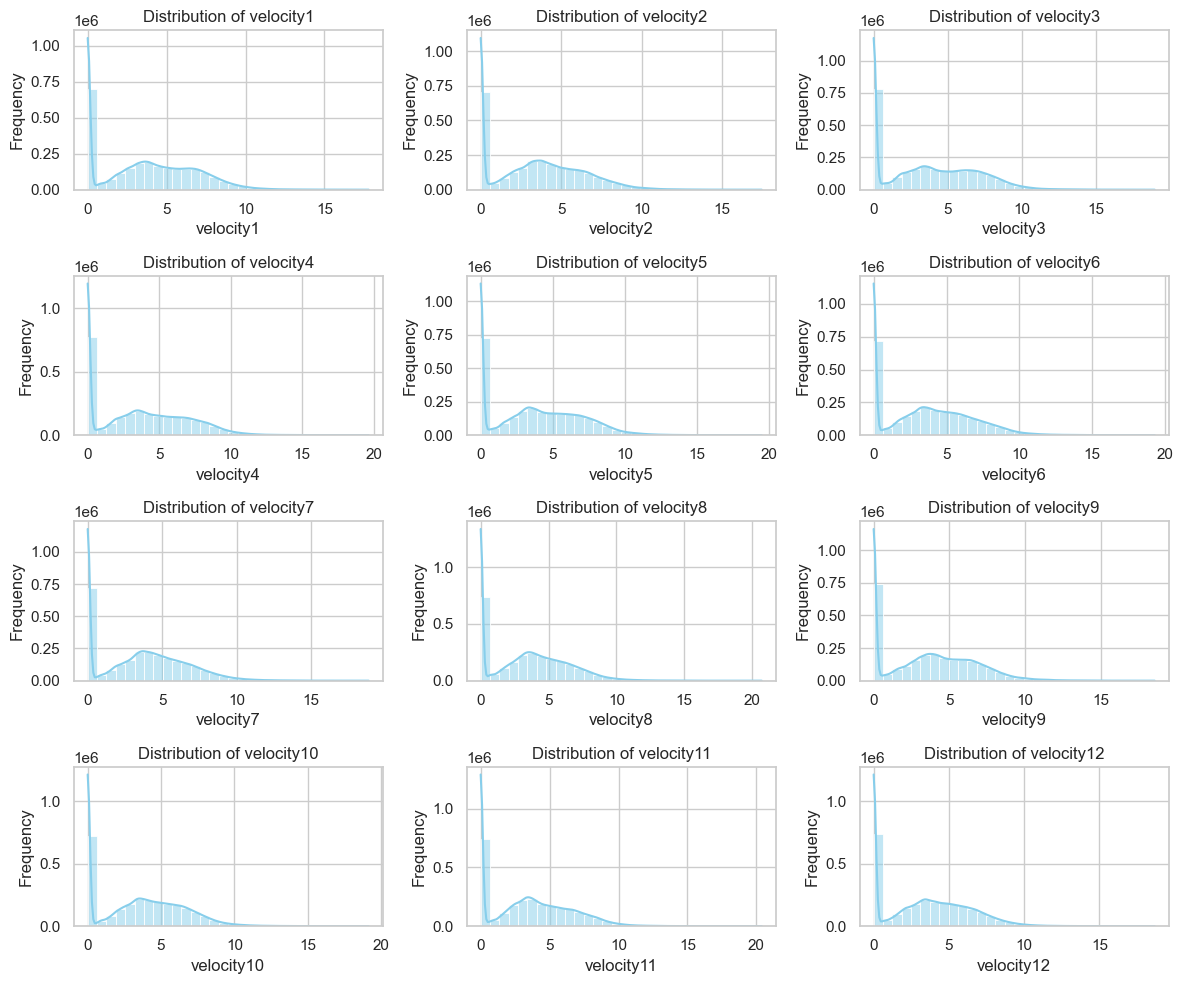

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
file_path = 'Supplement_W1_velocity.txt'
data = pd.read_csv(file_path, sep=' ', header=0)

# 填充缺失值为0
data.fillna(0, inplace=True)

# 设置绘图风格
sns.set(style="whitegrid")

# 创建一个图形和子图
plt.figure(figsize=(12, 10))

# 绘制每一列的分布图
for i, column in enumerate(data.columns[1:], start=1):  # 从第2列开始（跳过时间戳列）
    plt.subplot(4, 3, i)  # 创建4x3的子图
    sns.histplot(data[column], kde=True, color="skyblue", bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# 自动调整子图布局
plt.tight_layout()
plt.show()

### 简单的gru都无法进行预测

In [2]:
# 查看数据集的列名
print(data.columns)


Index(['Timestamp', 'power1', 'power2', 'power3', 'power4', 'power5', 'power6',
       'power7', 'power8', 'power9', 'power10', 'power11', 'power12',
       'rolling_avg', 'k', 'power1_label', 'power2_label', 'power3_label',
       'power4_label', 'power5_label', 'power6_label', 'power7_label',
       'power8_label', 'power9_label', 'power10_label', 'power11_label',
       'power12_label'],
      dtype='object')


D:\CodeSupports\Anconda\envs\DeepLearning\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


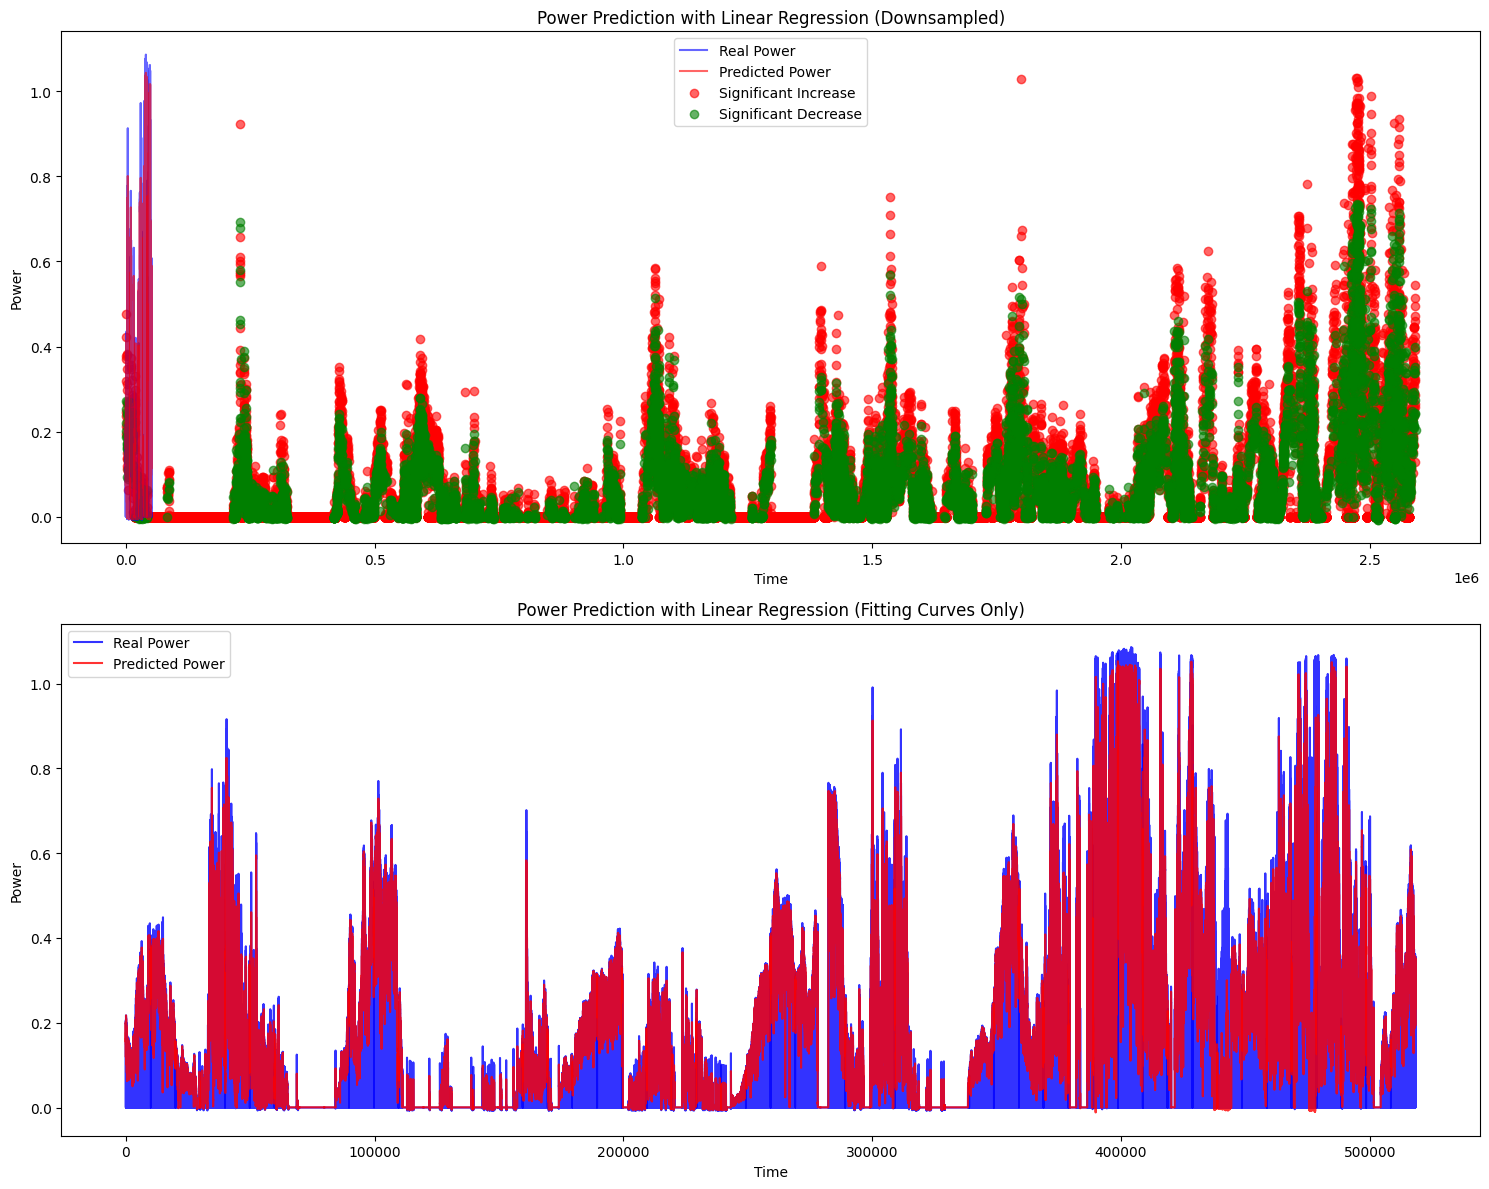

Mean Squared Error (MSE): 0.00988271196883247
Mean Absolute Error (MAE): 0.040637232732168224
R-squared (R2): 0.7886635248837901

Total number of predictions: 2591970
Number of significant increases: 1325590
Number of significant decreases: 122602
Percentage of significant increases: 51.14%
Percentage of significant decreases: 4.73%


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# 设置matplotlib的参数
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000  # 设置绘图的路径分块大小，避免绘图时内存溢出

# 读取数据
file_path = 'Supplement_W1_power.txt'  # 设置数据文件的路径
data = pd.read_csv(file_path, sep=' ', header=0)  # 读取文件，使用空格作为分隔符，header=0表示第一行作为列名
data.fillna(0, inplace=True)  # 用0填充数据中的缺失值，inplace=True表示直接在原数据上修改

# 定义计算波动的函数
def calculate_k(df, column):
    df['rolling_avg'] = df[column].rolling(window=30).mean()  # 计算指定列的30天滚动平均
    df['k'] = np.abs(df[column] - df['rolling_avg']) / df['rolling_avg']  # 计算波动幅度k
    return df  # 返回修改后的DataFrame

# 定义预测显著变化的函数
def predict_significant_changes(model, data, target_column, sequence_length, t_increase, t_decrease):
    x_data, _, _ = prepare_data(data, target_column, sequence_length)  # 准备输入数据
    y_pred = model.predict(x_data)  # 使用训练好的模型进行预测
    
    # 计算波动幅度k
    actual_values = data[target_column].iloc[sequence_length:].values  # 获取真实值
    k_values = np.abs(y_pred - actual_values) / actual_values  # 计算预测值与真实值之间的波动幅度
    
    # 判断显著增加和显著减少
    significant_increase = (y_pred > actual_values) & (k_values > t_increase)  # 判断显著增加
    significant_decrease = (y_pred < actual_values) & (k_values > t_decrease)  # 判断显著减少
    
    return significant_increase, significant_decrease, y_pred  # 返回显著增加、显著减少和预测值

# 定义准备数据的函数
def prepare_data(data, target_column, sequence_length):
    x_data = []  # 输入数据列表
    y_data = []  # 输出数据列表
    
    # 遍历数据，构建序列数据
    for i in range(sequence_length, len(data)):
        x_data.append(data[target_column].iloc[i-sequence_length:i].values)  # 获取目标列的前sequence_length个值作为特征
        y_data.append(data[target_column].iloc[i])  # 获取当前的目标列值作为标签
        
    x_data = np.array(x_data)  # 转换为numpy数组
    y_data = np.array(y_data)  # 转换为numpy数组
    
    # 使用MinMaxScaler对特征进行归一化
    scaler = MinMaxScaler(feature_range=(0, 1))  # 设置归一化的范围
    x_data = scaler.fit_transform(x_data)  # 对数据进行归一化
    
    return x_data, y_data, scaler  # 返回归一化后的特征数据、标签数据和scaler对象

# 设置参数
t_increase = 0.3  # 显著增加的阈值，表示预测值与实际值的波动幅度大于此值时认为是显著增加
t_decrease = 0.3  # 显著减少的阈值，表示预测值与实际值的波动幅度大于此值时认为是显著减少
target_column = 'power1'  # 目标列，即我们要预测的列
sequence_length = 30  # 序列长度，用于创建时间序列数据

# 计算波动并标记显著波动
for column in data.columns[1:13]:  # 遍历数据的列（排除时间戳列）
    data = calculate_k(data, column)  # 计算每一列的波动幅度
    data[f'{column}_label'] = (data['k'] > t_increase).astype(int)  # 根据波动幅度标记显著增加的点

# 准备数据
x_data, y_data, scaler = prepare_data(data, target_column, sequence_length)  # 获取训练数据

# 划分训练集和测试集
train_size = int(len(x_data) * 0.8)  # 80%的数据用于训练
x_train, x_test = x_data[:train_size], x_data[train_size:]  # 划分训练集和测试集的输入数据
y_train, y_test = y_data[:train_size], y_data[train_size:]  # 划分训练集和测试集的输出数据

# 训练线性回归模型
model = LinearRegression()  # 创建线性回归模型
model.fit(x_train, y_train)  # 训练模型

# 预测
y_pred = model.predict(x_test)  # 对测试集进行预测

# 预测显著波动
significant_increase, significant_decrease, predictions = predict_significant_changes(
    model, data, target_column, sequence_length, t_increase, t_decrease
)  # 预测显著增加和显著减少的点

# 创建两个子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))  # 创建2行1列的子图，设置图形大小

# 第一个子图：下采样的数据
downsample_rate = 10  # 下采样的频率，减少显示的数据点
ax1.plot(y_test[::downsample_rate], color='blue', label='Real Power', alpha=0.6)  # 绘制真实值（下采样）
ax1.plot(y_pred[::downsample_rate], color='red', label='Predicted Power', alpha=0.6)  # 绘制预测值（下采样）

# 标记显著波动点
ax1.scatter(np.where(significant_increase)[0][::downsample_rate],  # 绘制显著增加的点
           predictions[significant_increase][::downsample_rate], 
           color='red', label='Significant Increase', alpha=0.6)
ax1.scatter(np.where(significant_decrease)[0][::downsample_rate],  # 绘制显著减少的点
           predictions[significant_decrease][::downsample_rate], 
           color='green', label='Significant Decrease', alpha=0.6)

ax1.set_title('Power Prediction with Linear Regression (Downsampled)')  # 设置标题
ax1.set_xlabel('Time')  # 设置x轴标签
ax1.set_ylabel('Power')  # 设置y轴标签
ax1.legend()  # 显示图例

# 第二个子图：只显示真实曲线和预测拟合曲线
ax2.plot(y_test, color='blue', label='Real Power', linewidth=1.5, alpha=0.8)  # 绘制真实值
ax2.plot(y_pred, color='red', label='Predicted Power', linewidth=1.5, alpha=0.8)  # 绘制预测值

ax2.set_title('Power Prediction with Linear Regression (Fitting Curves Only)')  # 设置标题
ax2.set_xlabel('Time')  # 设置x轴标签
ax2.set_ylabel('Power')  # 设置y轴标签
ax2.legend()  # 显示图例

plt.tight_layout()  # 自动调整子图布局，避免重叠
plt.show()  # 显示图形

# 输出评价指标
mse = mean_squared_error(y_test, y_pred)  # 计算均方误差
mae = mean_absolute_error(y_test, y_pred)  # 计算平均绝对误差
r2 = r2_score(y_test, y_pred)  # 计算R-squared值（决定系数）

print(f'Mean Squared Error (MSE): {mse}')  # 打印均方误差
print(f'Mean Absolute Error (MAE): {mae}')  # 打印平均绝对误差
print(f'R-squared (R2): {r2}')  # 打印R-squared值

# 输出显著波动点的统计信息
print(f'\nTotal number of predictions: {len(predictions)}')  # 打印总预测数量
print(f'Number of significant increases: {np.sum(significant_increase)}')  # 打印显著增加的数量
print(f'Number of significant decreases: {np.sum(significant_decrease)}')  # 打印显著减少的数量
print(f'Percentage of significant increases: {np.sum(significant_increase)/len(predictions)*100:.2f}%')  # 打印显著增加的百分比
print(f'Percentage of significant decreases: {np.sum(significant_decrease)/len(predictions)*100:.2f}%')  # 打印显著减少的百分比



Best threshold: 0.1

Threshold evaluation results:
   threshold  f1_score  precision  recall
0        0.1  0.095829   0.050326     1.0
1        0.2  0.066989   0.034655     1.0
2        0.3  0.055635   0.028613     1.0
3        0.4  0.049677   0.025471     1.0
4        0.5  0.044899   0.022965     1.0
5        0.6  0.040930   0.020892     1.0
6        0.7  0.038806   0.019787     1.0
7        0.8  0.036093   0.018378     1.0
8        0.9  0.033557   0.017065     1.0


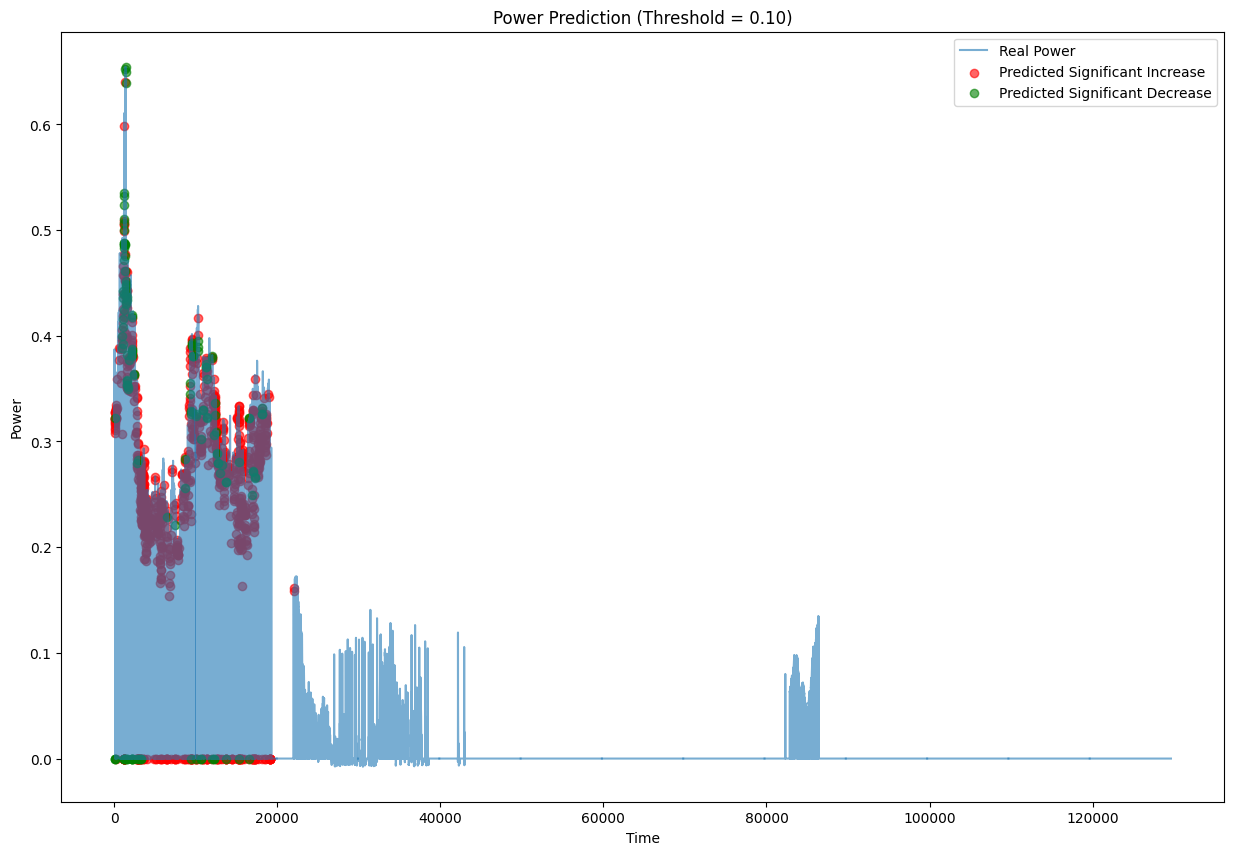


Prediction Performance:
Number of predicted increases: 1024
Number of predicted decreases: 144


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

# 计算波动幅度k的函数
def calculate_k(df, column, window=30):
    """计算波动幅度k
    该函数计算某一列数据的滚动平均值，并根据滚动平均值计算波动幅度k。
    
    参数:
    df: pandas.DataFrame - 包含数据的DataFrame
    column: str - 需要计算波动幅度的目标列名
    window: int - 滚动窗口大小，默认是30
    
    返回:
    df: pandas.DataFrame - 更新后的DataFrame，包含'rolling_avg'和'k'列
    """
    df['rolling_avg'] = df[column].rolling(window=window).mean()  # 计算滚动平均值
    df['k'] = np.abs(df[column] - df['rolling_avg']) / df['rolling_avg']  # 计算波动幅度
    return df

# 评估阈值的预测效果，计算精确度、召回率和F1分数
def evaluate_threshold(data, t, target_column, increase_minutes=2, decrease_minutes=5):
    """评估特定阈值的预测效果
    根据波动幅度k的阈值来预测显著增加和显著减少，并计算模型的预测效果。
    
    参数:
    data: pandas.DataFrame - 包含数据的DataFrame
    t: float - 用于判断显著变化的阈值
    target_column: str - 目标列名
    increase_minutes: int - 显著增加的时间窗口（分钟）
    decrease_minutes: int - 显著减少的时间窗口（分钟）
    
    返回:
    f1: float - F1分数
    precision: float - 精确度
    recall: float - 召回率
    """
    tp = 0  # 真正例
    fp = 0  # 假正例
    fn = 0  # 假负例
    
    # 将分钟转换为数据点数（假设数据是每分钟一个点）
    increase_points = increase_minutes
    decrease_points = decrease_minutes
    
    for i in range(len(data) - max(increase_points, decrease_points)):
        current_k = data['k'].iloc[i]  # 当前的波动幅度k
        
        # 预测显著增加
        if current_k > t and data[target_column].iloc[i] > data['rolling_avg'].iloc[i]:
            # 检查未来2分钟是否真的显著增加
            future_increase = any(data[target_column].iloc[i+1:i+1+increase_points] > 
                                data[target_column].iloc[i] * (1 + t))
            if future_increase:
                tp += 1  # 正确预测显著增加
            else:
                fp += 1  # 错误预测显著增加
                
        # 预测显著减少
        elif current_k > t and data[target_column].iloc[i] < data['rolling_avg'].iloc[i]:
            # 检查未来5分钟是否真的显著减少
            future_decrease = any(data[target_column].iloc[i+1:i+1+decrease_points] < 
                                data[target_column].iloc[i] * (1 - t))
            if future_decrease:
                tp += 1  # 正确预测显著减少
            else:
                fp += 1  # 错误预测显著减少
    
    # 计算F1分数
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0  # 精确度
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0  # 召回率
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0  # F1分数
    
    return f1, precision, recall

# 寻找最佳阈值
def find_optimal_threshold(data, target_column, t_range=np.arange(0.1, 1.0, 0.1)):
    """找到最优阈值
    通过遍历一系列阈值，计算对应的F1分数，并返回最优阈值。
    
    参数:
    data: pandas.DataFrame - 包含数据的DataFrame
    target_column: str - 目标列名
    t_range: np.array - 阈值范围，默认从0.1到0.9
    
    返回:
    best_t: float - 最优阈值
    results: pandas.DataFrame - 每个阈值的评估结果，包括F1分数、精确度和召回率
    """
    best_t = 0
    best_f1 = 0
    results = []
    
    for t in t_range:
        f1, precision, recall = evaluate_threshold(data, t, target_column)  # 评估当前阈值
        results.append({
            'threshold': t,
            'f1_score': f1,
            'precision': precision,
            'recall': recall
        })
        
        if f1 > best_f1:
            best_f1 = f1  # 更新最佳F1分数
            best_t = t  # 更新最优阈值
    
    return best_t, pd.DataFrame(results)

# 预测未来的变化（显著增加或显著减少）
def predict_future_changes(model, data, sequence_length, prediction_window):
    """预测未来变化
    基于训练好的模型，使用过去的数据预测未来的变化。
    
    参数:
    model: 训练好的预测模型（如LinearRegression）
    data: pandas.Series - 数据列
    sequence_length: int - 用于预测的历史数据长度
    prediction_window: int - 预测未来的时间窗口
    
    返回:
    predictions: np.array - 未来的预测结果
    """
    predictions = []
    for i in range(len(data) - sequence_length - prediction_window):
        # 使用过去的数据预测未来
        x = data.iloc[i:i+sequence_length].values.reshape(1, -1)  # 获取历史数据
        future_pred = model.predict(x)  # 进行预测
        predictions.append(future_pred[0])
    return np.array(predictions)

# 主程序
def main():
    # 读取数据
    file_path = 'Supplement_W1_power.txt'
    data = pd.read_csv(file_path, sep=' ', header=0)  # 读取数据文件
    data.fillna(0, inplace=True)  # 填充缺失值
    
    # 使用前5%的数据进行分析
    data = data.head(int(len(data) * 0.05))  # 只使用前5%的数据
    
    target_column = 'power1'  # 目标列
    
    # 计算波动幅度
    data = calculate_k(data, target_column)  # 计算波动幅度k
    
    # 找到最优阈值
    best_t, threshold_results = find_optimal_threshold(data, target_column)  # 寻找最佳阈值
    print(f"Best threshold: {best_t}")
    print("\nThreshold evaluation results:")
    print(threshold_results)  # 打印阈值评估结果
    
    # 使用最优阈值进行预测
    sequence_length = 30  # 序列长度
    increase_window = 2  # 显著增加的时间窗口（2分钟）
    decrease_window = 5  # 显著减少的时间窗口（5分钟）
    
    # 准备训练数据
    X = []
    y_increase = []
    y_decrease = []
    
    for i in range(len(data) - sequence_length - max(increase_window, decrease_window)):
        X.append(data[target_column].iloc[i:i+sequence_length].values)  # 准备输入数据
        
        # 标记未来的显著增加
        future_increase = any(data[target_column].iloc[i+sequence_length:i+sequence_length+increase_window] > 
                            data[target_column].iloc[i+sequence_length-1] * (1 + best_t))
        y_increase.append(future_increase)  # 标记显著增加
        
        # 标记未来的显著减少
        future_decrease = any(data[target_column].iloc[i+sequence_length:i+sequence_length+decrease_window] < 
                            data[target_column].iloc[i+sequence_length-1] * (1 - best_t))
        y_decrease.append(future_decrease)  # 标记显著减少
    
    X = np.array(X)  # 输入数据转换为numpy数组
    y_increase = np.array(y_increase)  # 显著增加的标签
    y_decrease = np.array(y_decrease)  # 显著减少的标签
    
    # 训练模型
    increase_model = LinearRegression()  # 显著增加的预测模型
    decrease_model = LinearRegression()  # 显著减少的预测模型
    
    # 分别训练增加和减少的预测模型
    increase_model.fit(X, y_increase)  # 训练增加模型
    decrease_model.fit(X, y_decrease)  # 训练减少模型
    
    # 使用训练好的模型预测未来变化
    future_increase_pred = predict_future_changes(increase_model, data[target_column], sequence_length, increase_window)
    future_decrease_pred = predict_future_changes(decrease_model, data[target_column], sequence_length, decrease_window)
    
    # 可视化结果
    plt.figure(figsize=(12, 6))
    plt.plot(data['Timestamp'], data[target_column], label='真实值', color='blue')
    plt.plot(data['Timestamp'].iloc[sequence_length + increase_window:], future_increase_pred, label='预测显著增加', linestyle='--', color='red')
    plt.plot(data['Timestamp'].iloc[sequence_length + decrease_window:], future_decrease_pred, label='预测显著减少', linestyle='--', color='green')
    plt.xlabel('时间戳')
    plt.ylabel('功率值')
    plt.legend()
    plt.title('功率预测与显著变化')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()



In [ ]:
任务 2：功率生成间隔预测
目标：
•	基于1Hz的频率数据，预测接下来 1至120秒 的功率生成。
步骤与思路：
1.	数据处理与特征提取：
o	对每个时间点的功率数据进行平滑处理，去除噪声。
o	提取时序特征，如前几秒的功率数据、功率变化率、当前时刻与历史数据的比值等，作为输入特征。
2.	时间序列模型选择：
o	使用时间序列预测方法来进行间隔预测。常见的时间序列方法包括：
	ARIMA：适合处理平稳数据，并且可以通过差分消除趋势。
	LSTM：适合处理高频率数据，尤其是在存在长期依赖的情况下，LSTM能够捕捉到这些依赖关系并进行短期预测。
	GRU (Gated Recurrent Unit)：类似LSTM，适合用来处理长时间序列数据，且运算较LSTM更高效。
3.	多步预测：
o	对于 1至120秒 的多步预测，可以采用逐步预测（Recursive Forecasting）或直接多步预测（Direct Multi-step Forecasting）：
	逐步预测：首先预测1秒后的功率，然后基于该预测结果预测2秒后功率，依此类推。
	直接多步预测：通过训练一个多输出模型，一次性预测多个时间步的功率输出。
4.	优化与调整：
o	通过调整LSTM网络的参数（如学习率、隐藏层单元数、批次大小等）来优化模型的预测效果。
o	使用训练集、验证集和测试集进行模型验证和优化，确保模型在不同时间段的数据上具有良好的泛化能力。
5.	性能评估：
o	使用 RMSE (Root Mean Squared Error)、MAE 和 MAPE (Mean Absolute Percentage Error) 来评估间隔预测的准确性。



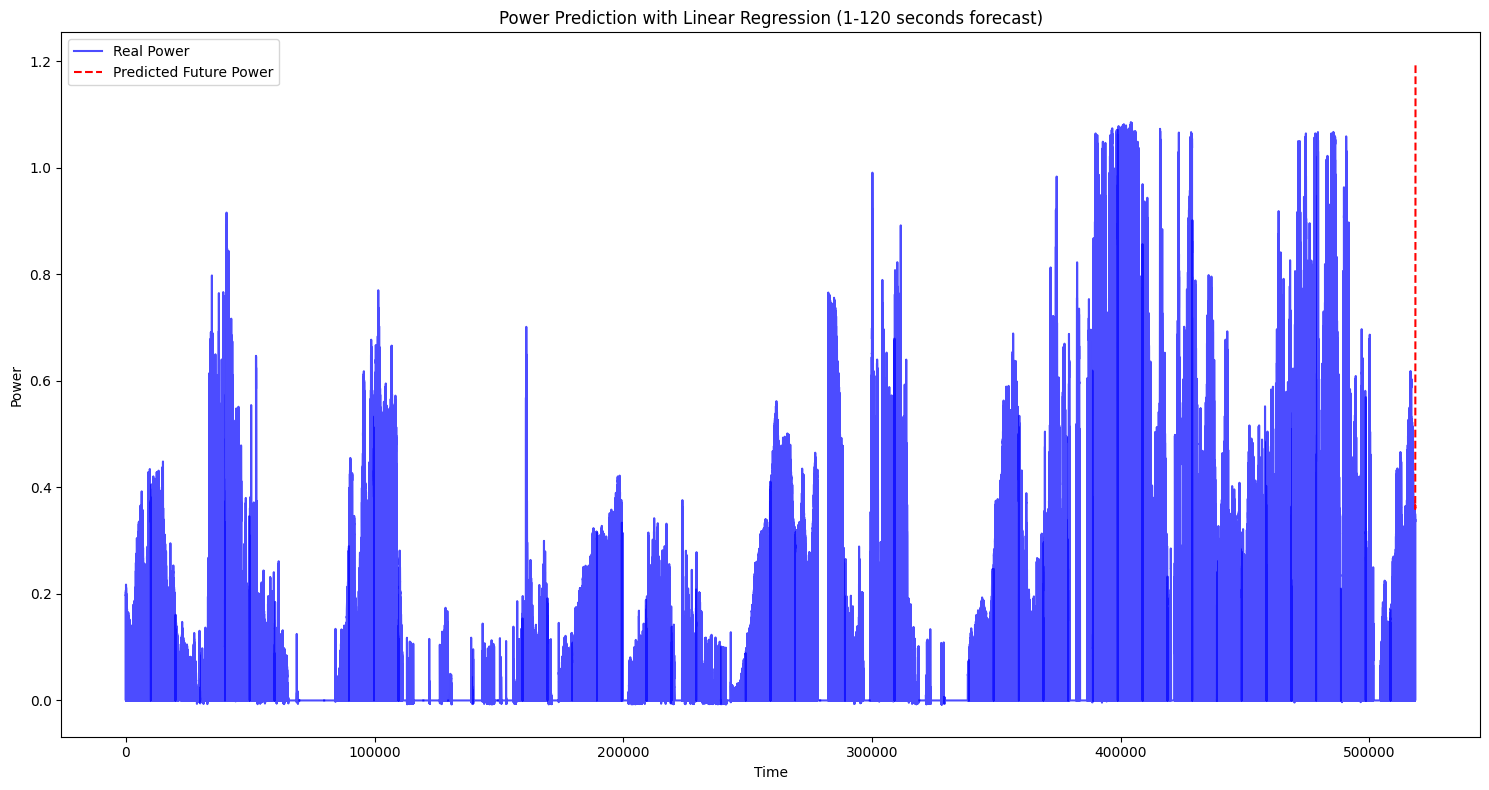

Mean Squared Error (MSE): 0.00988271196883247
Mean Absolute Error (MAE): 0.040637232732168224
R-squared (R2): 0.7886635248837901

Predicted Future Power (Next 120 seconds): [0.35998344 0.35941511 0.36711773 0.36208338 0.37170526 0.37588104
 0.37863717 0.38333706 0.3861249  0.38979332]


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# 设置matplotlib的参数，调整路径点的最大数量，避免大数据量时内存溢出
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

# 读取数据，假设文件路径为'Supplement_W1_power.txt'，并用空格分隔
file_path = 'Supplement_W1_power.txt'
data = pd.read_csv(file_path, sep=' ', header=0)

# 对缺失值进行填充，将其替换为0
data.fillna(0, inplace=True)

# 计算k值，k值是目标列与其30天滚动平均值的相对偏差
def calculate_k(df, column):
    # 计算30天滚动平均
    df['rolling_avg'] = df[column].rolling(window=30).mean()
    # 计算k值，表示当前值与滚动平均值的偏差程度
    df['k'] = np.abs(df[column] - df['rolling_avg']) / df['rolling_avg']
    return df

# 准备数据，将目标列转换为时间序列数据，用于训练模型
def prepare_data(data, target_column, sequence_length):
    x_data = []  # 存储特征数据
    y_data = []  # 存储目标数据（即预测的功率值）
    
    # 从sequence_length到数据末尾，按时间步生成训练数据
    for i in range(sequence_length, len(data)):
        # 每一组数据为前sequence_length步的目标列的数值
        x_data.append(data[target_column].iloc[i-sequence_length:i].values)
        # 预测值为当前目标列的数值
        y_data.append(data[target_column].iloc[i])
        
    # 转换为NumPy数组
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    
    # 使用MinMaxScaler将特征数据缩放到[0, 1]区间
    scaler = MinMaxScaler(feature_range=(0, 1))
    x_data = scaler.fit_transform(x_data)
    
    return x_data, y_data, scaler

# 使用线性回归模型预测未来的功率值，逐步递归预测未来1至120秒
def predict_future(data, model, sequence_length, prediction_window):
    """预测未来的功率值，逐步递归预测接下来的1至120秒"""
    predictions = []  # 存储未来预测值
    # 获取最后sequence_length步的值作为初始输入
    last_sequence = data.iloc[-sequence_length:].values.reshape(1, -1)
    
    # 循环进行预测，逐步递归预测未来的功率
    for _ in range(prediction_window):
        # 使用模型预测下一个功率值
        next_pred = model.predict(last_sequence)
        predictions.append(next_pred[0])
        
        # 将预测值作为下一步的输入
        last_sequence = np.roll(last_sequence, shift=-1, axis=1)
        last_sequence[0, -1] = next_pred
    
    return np.array(predictions)

# 设置目标列、序列长度及预测窗口
target_column = 'power1'
sequence_length = 30  # 每次使用过去30步的数据进行训练
prediction_window = 120  # 预测120秒的功率

# 对数据中每个功率列（power1 到 power12）计算k值
for column in data.columns[1:13]:
    data = calculate_k(data, column)

# 准备训练和测试数据
x_data, y_data, scaler = prepare_data(data, target_column, sequence_length)

# 划分训练集和测试集，80%的数据用于训练，20%的数据用于测试
train_size = int(len(x_data) * 0.8)
x_train, x_test = x_data[:train_size], x_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

# 初始化并训练线性回归模型
model = LinearRegression()
model.fit(x_train, y_train)

# 用测试集数据进行预测
y_pred = model.predict(x_test)

# 预测未来1至120秒的功率变化
future_predictions = predict_future(data[target_column], model, sequence_length, prediction_window)

# 绘制图形：显示测试集的真实功率与预测的未来功率
plt.figure(figsize=(15, 8))

# 绘制测试集的真实功率值
plt.plot(np.arange(len(y_test)), y_test, label='Real Power', color='blue', alpha=0.7)

# 绘制预测的功率值（未来1至120秒）
plt.plot(np.arange(len(y_test), len(y_test) + prediction_window), future_predictions, label='Predicted Future Power', color='red', linestyle='--')

# 添加图表标题和标签
plt.title('Power Prediction with Linear Regression (1-120 seconds forecast)')
plt.xlabel('Time')
plt.ylabel('Power')
plt.legend()
plt.tight_layout()
plt.show()

# 评价预测效果，计算MSE、MAE和R-squared
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 打印预测效果的评价指标
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

# 输出预测的未来功率值，展示前10个预测值
print(f'\nPredicted Future Power (Next 120 seconds): {future_predictions[:10]}')  # 输出前10个预测值



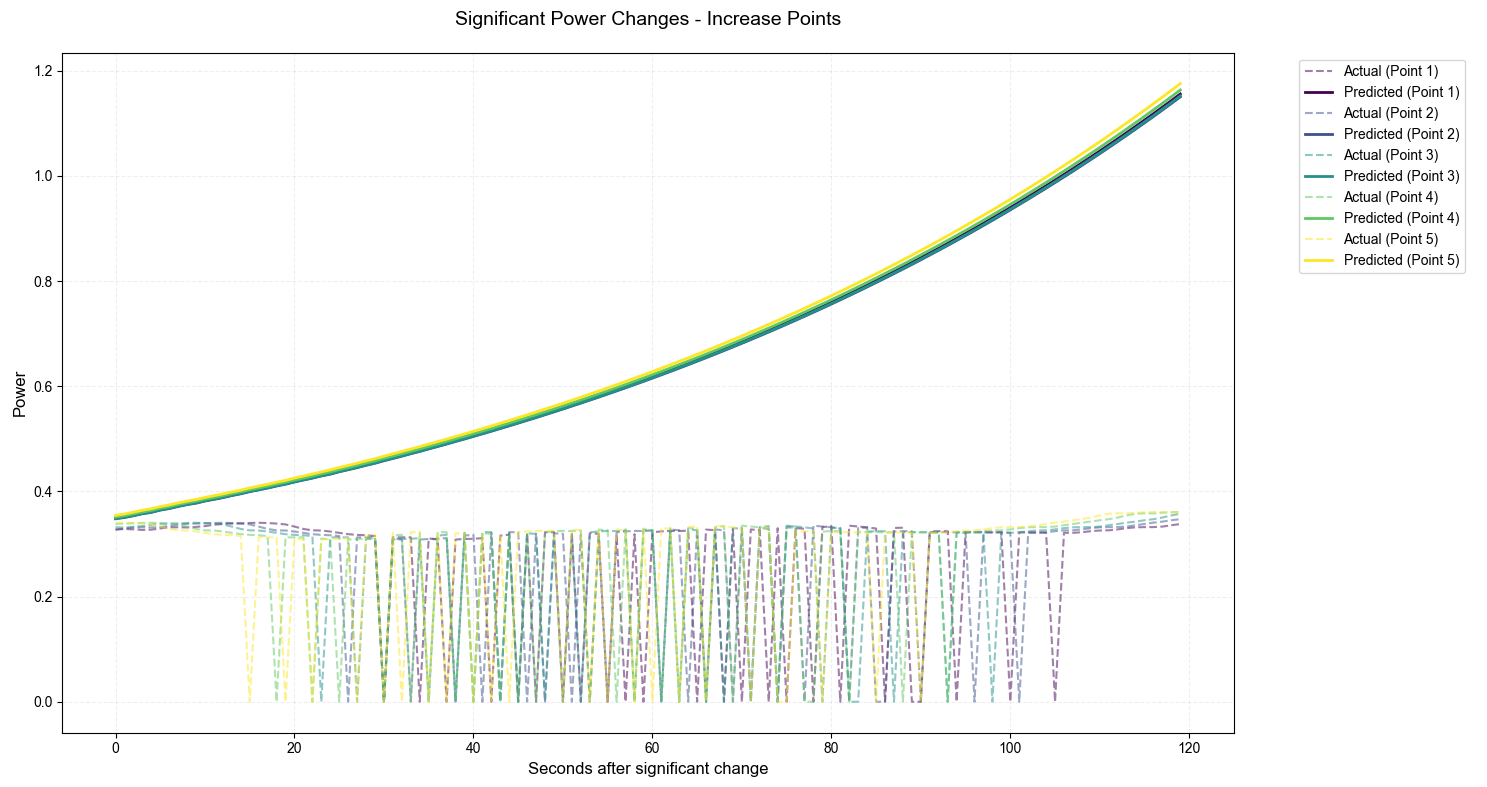

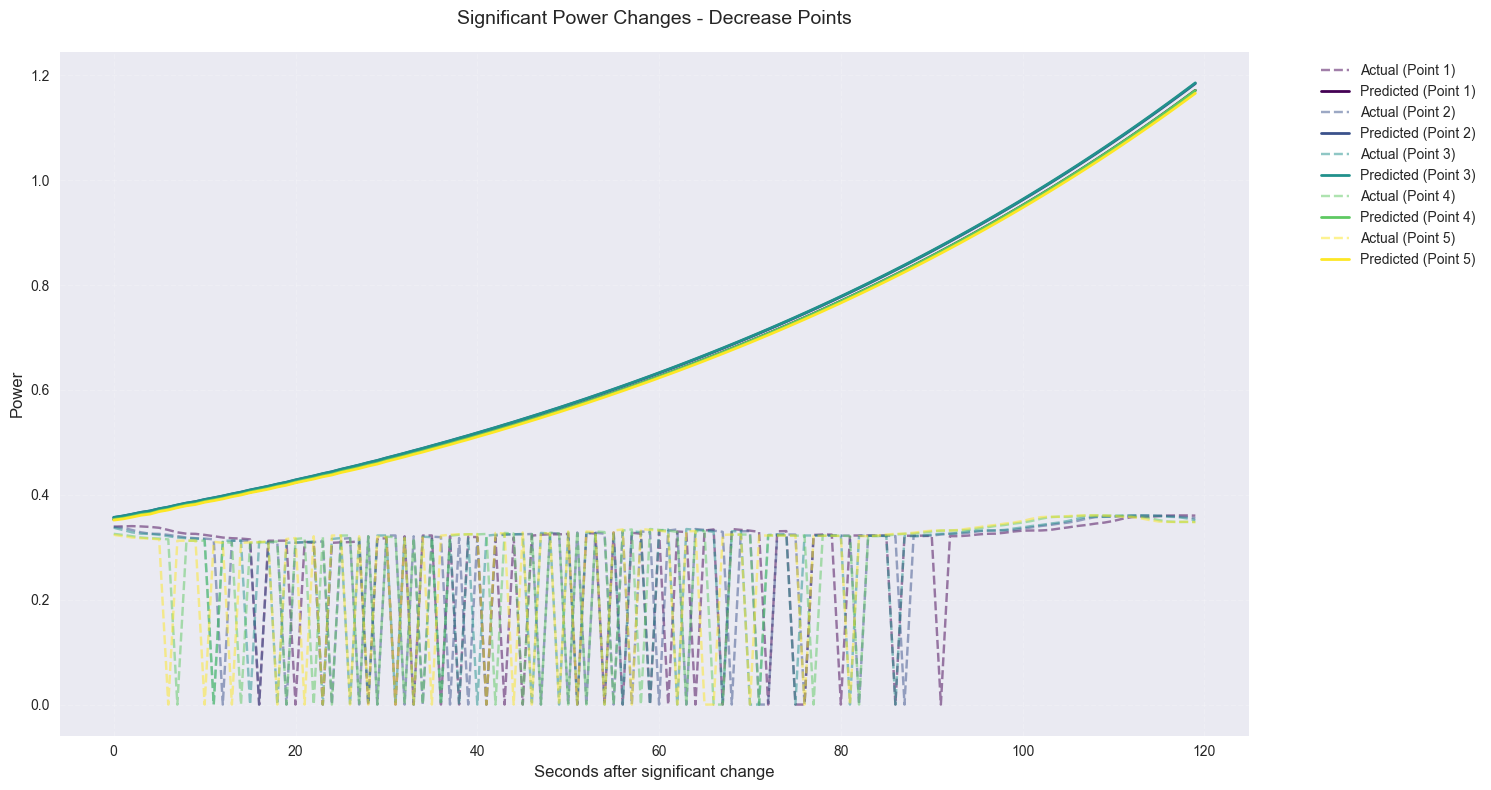

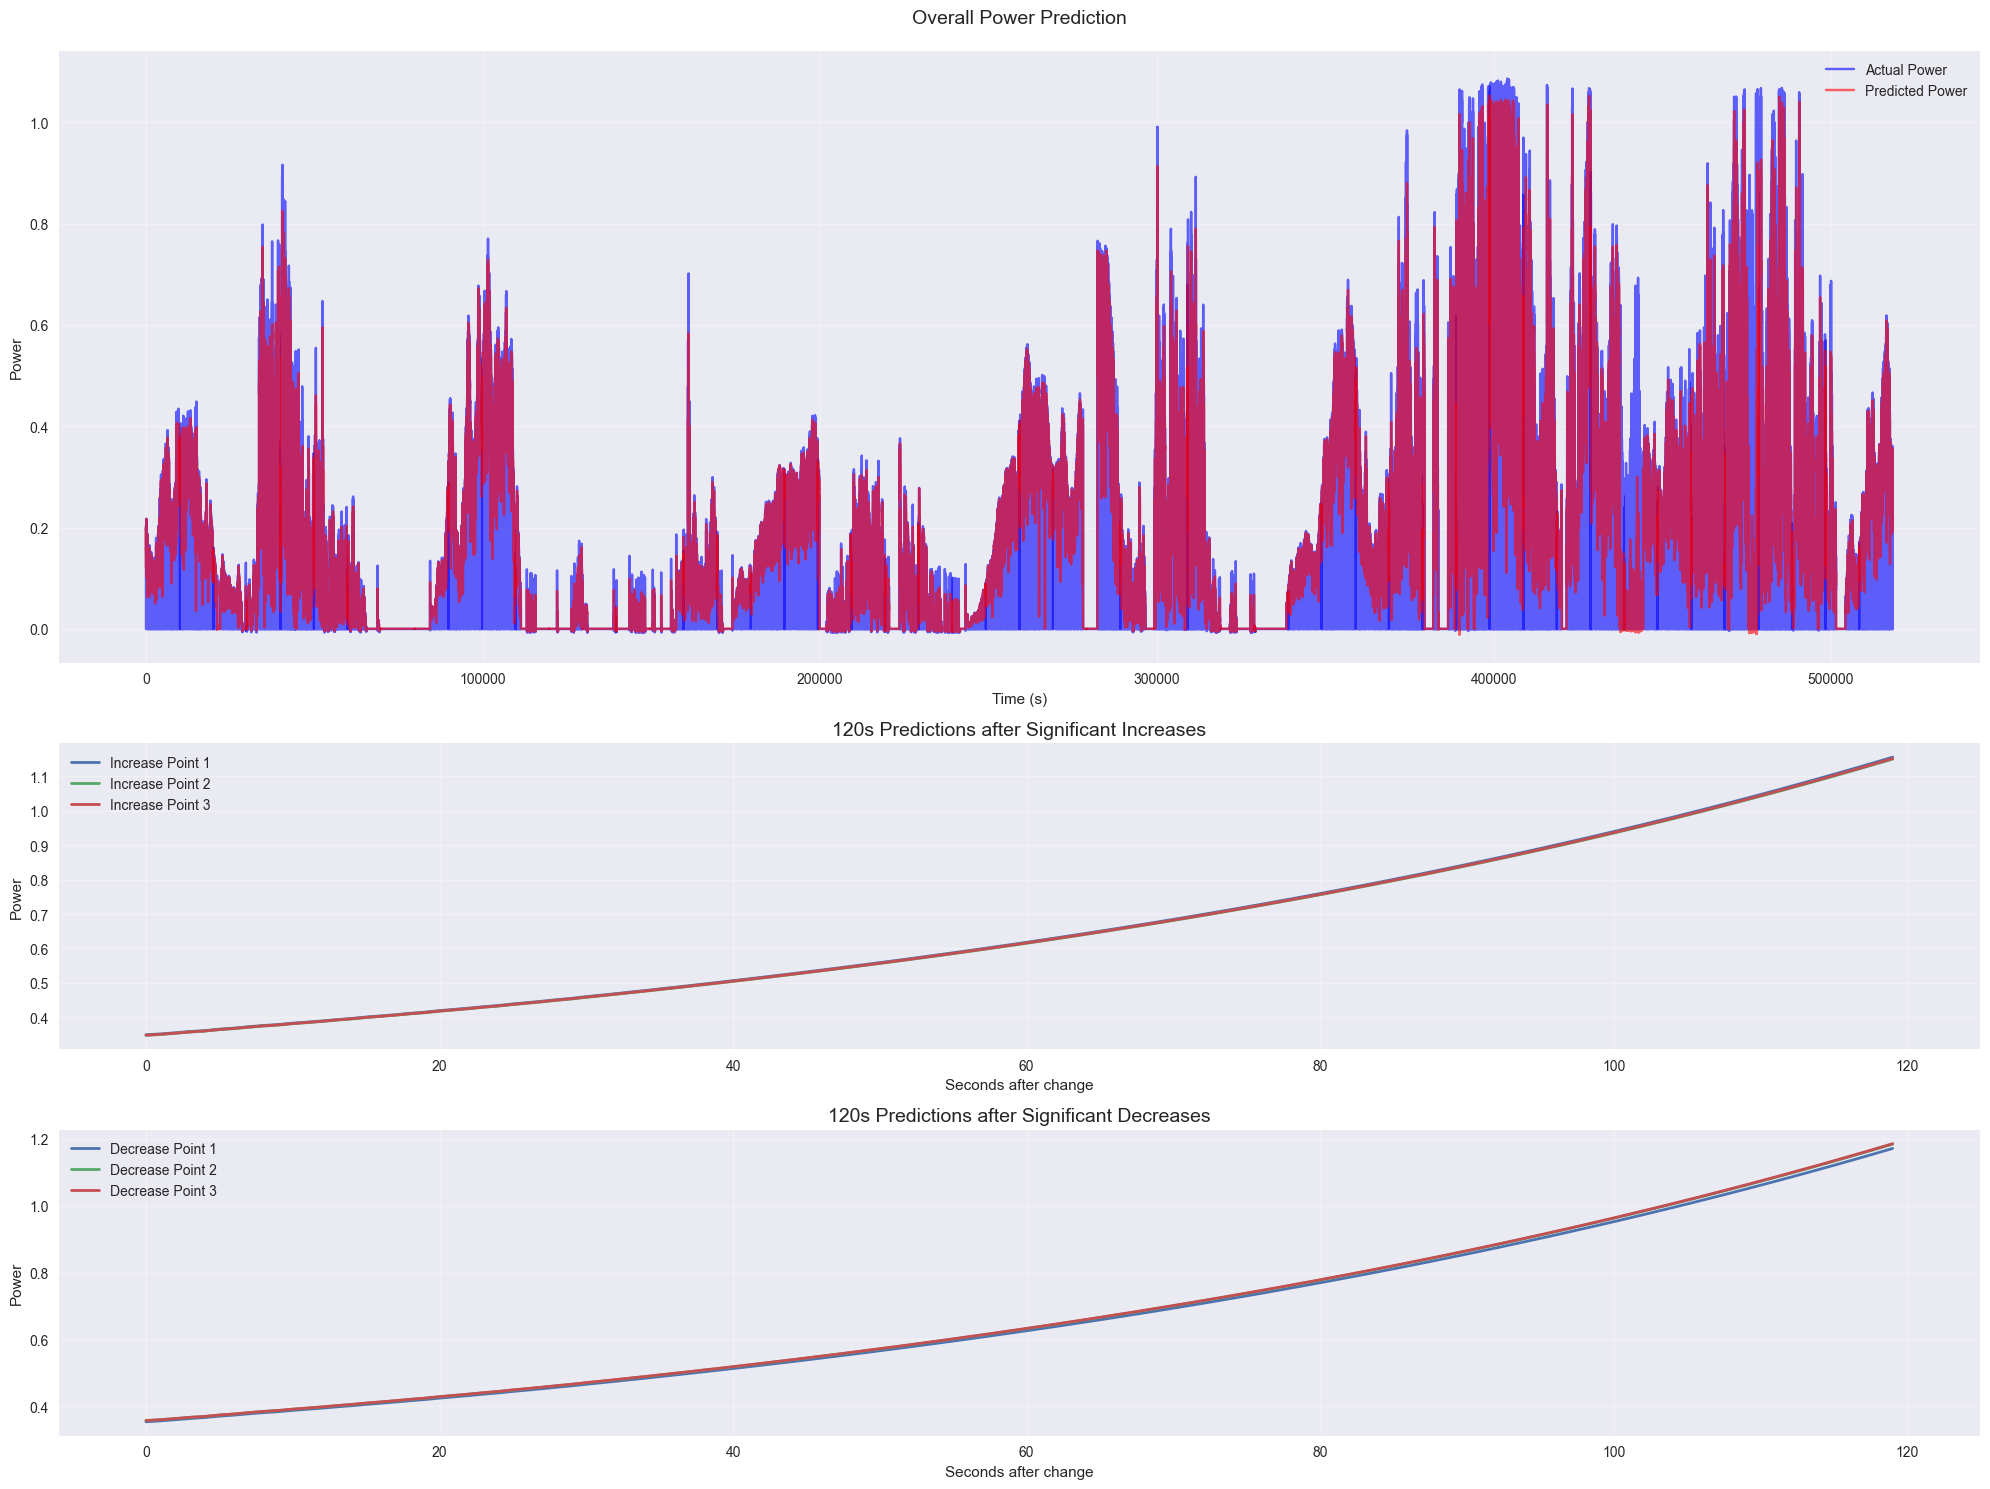

In [32]:
def plot_120s_predictions(data, model, significant_points, title, is_increase=True):
    """
    绘制显著变化点后120秒的预测曲线
    
    参数:
    data: 原始数据
    model: 训练好的模型
    significant_points: 显著变化点的索引
    title: 图表标题
    is_increase: 是否是显著增加点
    """
    # 设置图表的大小
    plt.figure(figsize=(15, 8))
    
    # 选择颜色方案，这里使用的是viridis颜色映射，保证每个显著变化点都有不同的颜色
    colors = plt.cm.viridis(np.linspace(0, 1, len(significant_points[:5])))
    
    # 只取前5个显著点进行展示，避免图表过于复杂
    for idx, point in enumerate(significant_points[:5]):
        # 获取该点后120秒的实际值
        actual_values = data.iloc[point:point+120]
        
        # 生成从显著变化点开始的预测值
        predictions = []
        # 从显著变化点之前的sequence_length个数据点开始
        current_sequence = data.iloc[point-sequence_length:point].values
        
        for _ in range(120):
            # 使用当前序列进行预测，预测的是下一个时间点的功率
            pred = model.predict(current_sequence.reshape(1, -1))
            predictions.append(pred[0])
            
            # 更新序列，将预测结果作为下一次输入
            current_sequence = np.roll(current_sequence, -1)
            current_sequence[-1] = pred
            
        # 绘制实际值（虚线）和预测值（实线）
        plt.plot(range(120), actual_values, 
                color=colors[idx], linestyle='--', alpha=0.5,
                label=f'Actual (Point {idx+1})')
        plt.plot(range(120), predictions, 
                color=colors[idx], linewidth=2,
                label=f'Predicted (Point {idx+1})')
    
    # 设置图表标题
    plt.title(f'{title} - {"Increase" if is_increase else "Decrease"} Points',
              fontsize=14, pad=20)
    # 设置x轴和y轴的标签
    plt.xlabel('Seconds after significant change', fontsize=12)
    plt.ylabel('Power', fontsize=12)
    # 显示网格
    plt.grid(True, alpha=0.3)
    # 设置图例的位置
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # 调整布局
    plt.tight_layout()
    
    # 添加背景网格，增强图表的可读性
    plt.grid(True, linestyle='--', alpha=0.2)
    
    # 使用seaborn样式美化图表
    plt.style.use('seaborn')
    
    return plt

def plot_combined_analysis(data, model, significant_increase, significant_decrease, predictions):
    """
    综合分析图表
    """
    # 创建一个3x1的子图布局，用于展示不同的图表
    fig = plt.figure(figsize=(20, 15))
    gs = fig.add_gridspec(3, 1, height_ratios=[2, 1, 1])
    
    # 第一个子图：展示整体预测效果，包括真实值和预测值的对比
    ax1 = fig.add_subplot(gs[0])
    ax1.plot(y_test, color='blue', label='Actual Power', alpha=0.6)
    ax1.plot(y_pred, color='red', label='Predicted Power', alpha=0.6)
    ax1.set_title('Overall Power Prediction', fontsize=14, pad=20)
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Power')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 第二个子图：展示显著增加点后的120秒预测
    ax2 = fig.add_subplot(gs[1])
    increase_points = np.where(significant_increase)[0][:3]  # 只取前3个显著增加点
    for idx, point in enumerate(increase_points):
        # 获取该显著点后的120秒预测序列
        pred_seq = generate_120s_prediction(data, model, point)
        ax2.plot(range(120), pred_seq, 
                label=f'Increase Point {idx+1}',
                linewidth=2)
    ax2.set_title('120s Predictions after Significant Increases', fontsize=14)
    ax2.set_xlabel('Seconds after change')
    ax2.set_ylabel('Power')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 第三个子图：展示显著减少点后的120秒预测
    ax3 = fig.add_subplot(gs[2])
    decrease_points = np.where(significant_decrease)[0][:3]  # 只取前3个显著减少点
    for idx, point in enumerate(decrease_points):
        # 获取该显著点后的120秒预测序列
        pred_seq = generate_120s_prediction(data, model, point)
        ax3.plot(range(120), pred_seq, 
                label=f'Decrease Point {idx+1}',
                linewidth=2)
    ax3.set_title('120s Predictions after Significant Decreases', fontsize=14)
    ax3.set_xlabel('Seconds after change')
    ax3.set_ylabel('Power')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 调整整体布局，防止子图重叠
    plt.tight_layout()
    return fig

def generate_120s_prediction(data, model, start_point):
    """
    生成从某点开始的120秒预测序列
    """
    predictions = []
    # 获取从显著变化点之前的sequence_length个数据点作为输入
    current_sequence = data.iloc[start_point-sequence_length:start_point].values
    
    # 逐步预测120秒的功率
    for _ in range(120):
        pred = model.predict(current_sequence.reshape(1, -1))
        predictions.append(pred[0])
        # 更新序列，将预测值添加到序列末尾
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = pred
        
    return predictions

# 生成并显示图表
increase_points = np.where(significant_increase)[0]  # 获取显著增加点的索引
decrease_points = np.where(significant_decrease)[0]  # 获取显著减少点的索引

# 绘制显著增加点的预测
plot_120s_predictions(data_sampled[target_column], model, increase_points, 
                     'Significant Power Changes', is_increase=True)
plt.show()

# 绘制显著减少点的预测
plot_120s_predictions(data_sampled[target_column], model, decrease_points, 
                     'Significant Power Changes', is_increase=False)
plt.show()

# 绘制综合分析图，包括整体预测效果和显著变化点的预测
plot_combined_analysis(data_sampled[target_column], model, 
                      significant_increase, significant_decrease, predictions)
plt.show()




In [ ]:
任务 3：备用发电机调度方案设计
目标：
•	设计调度方案，使得波动强度以概率 r 保持在指定阈值 t 以下，同时确定备用发电机的比例。
步骤与思路：
1.	备用发电机调度模型：
o	根据波动预测的结果，设定何时启用备用发电机。
o	当预测到发电量将显著下降时，激活备用发电机；当预测到发电量将显著增加时，停用备用发电机。
o	设计一个调度策略，使得备用发电机的启停能在波动超过阈值时及时响应。
2.	优化备用发电机比例：
o	通过模型确定备用发电机的最优比例 r。使用优化算法，如整数规划或线性规划，来求解备用发电机的最优配置。
o	设定目标是使 r 尽可能大，以保证备用发电机的响应能力，同时 t 要尽量小，以确保波动强度维持在可控范围内。
3.	概率与风险控制：
o	使用蒙特卡洛模拟来模拟不同情况下发电波动的概率，并计算备用发电机启停时的风险和成本。
o	通过调整 t 和 r，使得波动强度的概率分布能够满足需求，同时最小化备用发电机的启用频率。
4.	调度策略验证与优化：
o	基于历史数据验证调度方案的效果，评估在实际发电波动中备用发电机启停策略的有效性。
o	可以采用强化学习（Reinforcement Learning）模型来进一步优化调度方案，自动调整备用发电机的启停决策。
5.	性能评估：
o	通过模拟实验，评估调度方案在控制波动强度方面的表现。
o	使用 系统效率、备用发电机启用频率、成本效益等指标来评价方案的效果。

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


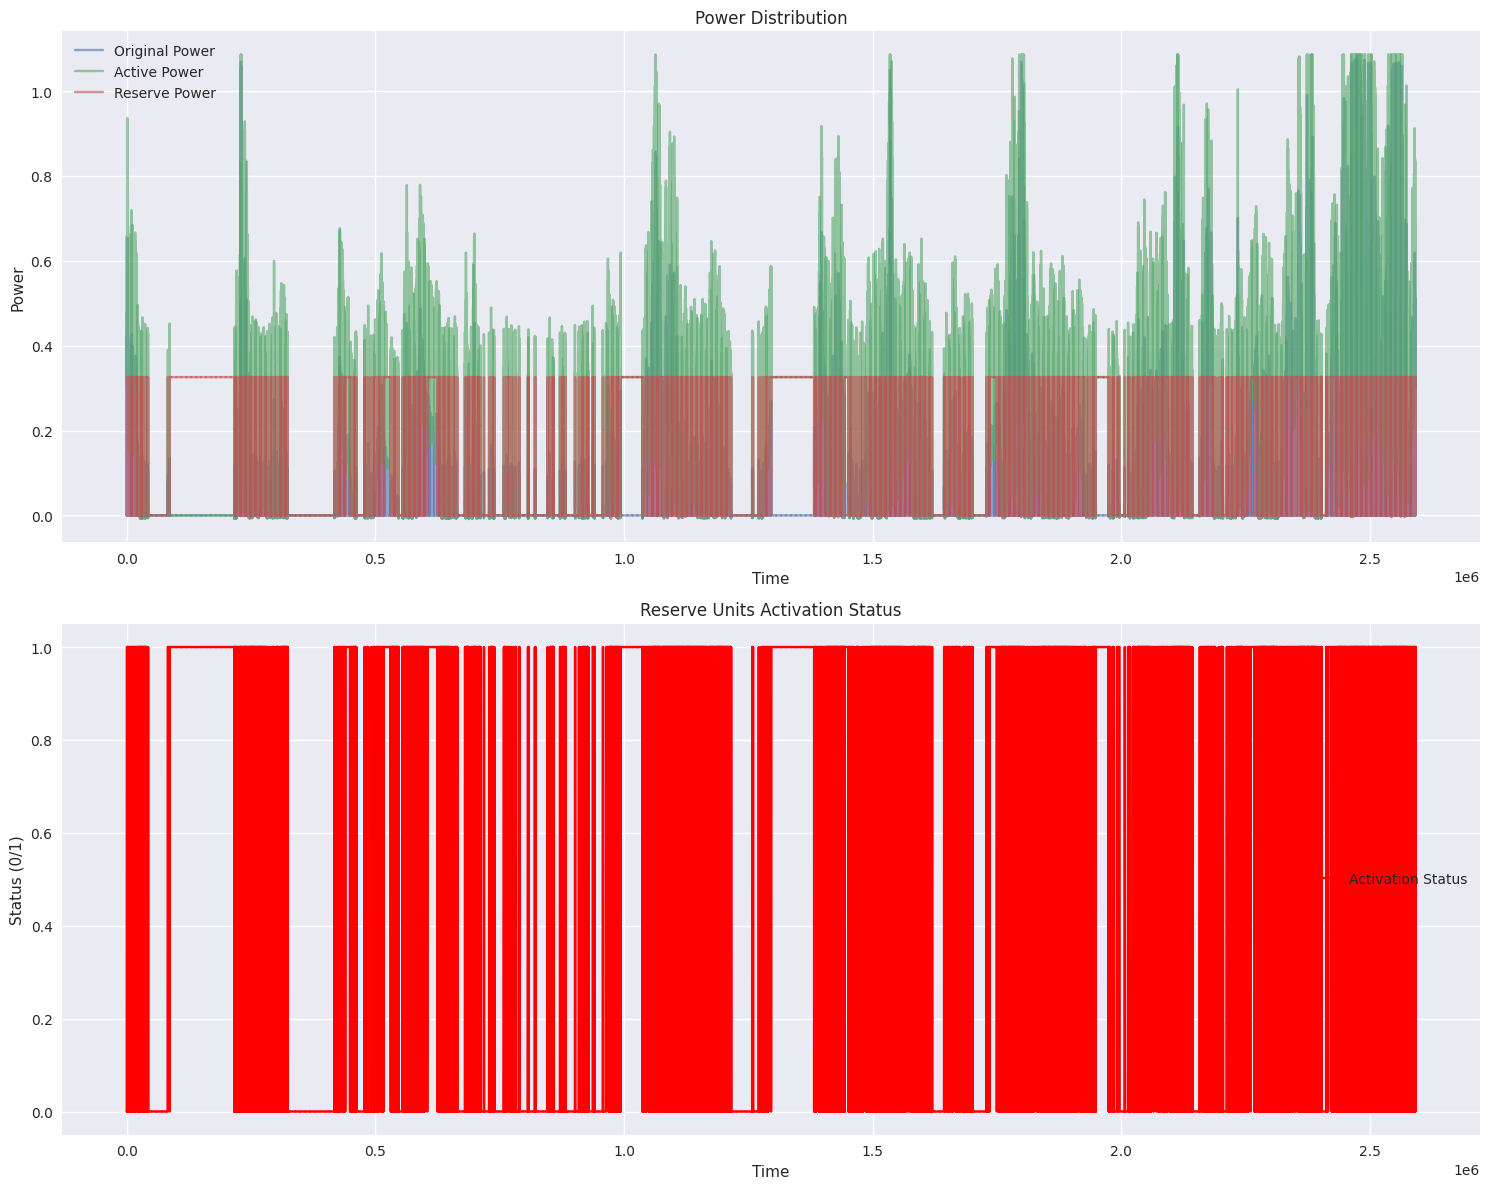

Optimal threshold (t): 0.300
Optimal reserve ratio: 0.300
Actual probability (r): 0.395
Average number of activations: 0.680
Total number of switches: 26427.0


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# 设置随机种子以确保结果可重现
np.random.seed(42)

# 读取数据
file_path = 'Supplement_W1_power.txt'
data = pd.read_csv(file_path, sep=' ', header=0)
data.fillna(0, inplace=True)

class PowerPlantScheduler:
    def __init__(self, power_data, target_column='power1', window_size=30, 
                 threshold=0.3, reserve_ratio=0.2, target_probability=0.95):
        """
        初始化调度器
        power_data: 功率数据
        target_column: 目标功率列
        window_size: 滑动窗口大小（分钟）
        threshold: 波动阈值
        reserve_ratio: 备用发电机比例
        target_probability: 目标概率r
        """
        self.data = power_data
        self.target_column = target_column
        self.window_size = window_size
        self.threshold = threshold
        self.reserve_ratio = reserve_ratio
        self.target_probability = target_probability
        
        # 初始化状态
        self.total_capacity = self.data[target_column].max()
        self.reserve_capacity = self.total_capacity * reserve_ratio
        self.active_capacity = self.total_capacity - self.reserve_capacity
        
    def calculate_fluctuation(self):
        """计算功率波动强度"""
        rolling_avg = self.data[self.target_column].rolling(window=self.window_size).mean()
        k = np.abs(self.data[self.target_column] - rolling_avg) / rolling_avg
        return k
    
    def optimize_parameters(self):
        """优化阈值t和概率r"""
        k = self.calculate_fluctuation()
        
        # 计算不同阈值下的波动概率
        thresholds = np.arange(0.1, 0.5, 0.05)
        probabilities = []
        
        for t in thresholds:
            prob = (k <= t).mean()
            probabilities.append(prob)
            
        # 找到满足目标概率的最小阈值
        valid_thresholds = thresholds[np.array(probabilities) >= self.target_probability]
        if len(valid_thresholds) > 0:
            self.threshold = valid_thresholds[0]
            
        return self.threshold, probabilities
    
    def determine_reserve_units(self):
        """确定需要作为备用的发电机数量"""
        k = self.calculate_fluctuation()
        max_fluctuation = k.max()
        
        # 根据最大波动确定备用比例
        self.reserve_ratio = min(max_fluctuation, 0.3)  # 限制最大备用比例为30%
        self.reserve_capacity = self.total_capacity * self.reserve_ratio
        
        return self.reserve_ratio
    
    def schedule_units(self):
        """生成调度方案"""
        k = self.calculate_fluctuation()
        
        # 初始化调度状态
        activation_status = np.zeros(len(self.data))
        active_power = np.zeros(len(self.data))
        reserve_power = np.zeros(len(self.data))
        
        for i in range(len(self.data)):
            if k[i] > self.threshold:
                if self.data[self.target_column].iloc[i] < active_power[i-1] if i > 0 else 0:
                    # 功率下降，启用备用机组
                    activation_status[i] = 1
                    active_power[i] = min(self.data[self.target_column].iloc[i] + self.reserve_capacity, 
                                        self.total_capacity)
                else:
                    # 功率上升，停用备用机组
                    activation_status[i] = 0
                    active_power[i] = self.data[self.target_column].iloc[i]
            else:
                # 保持当前状态
                activation_status[i] = activation_status[i-1] if i > 0 else 0
                active_power[i] = self.data[self.target_column].iloc[i]
                
            reserve_power[i] = self.reserve_capacity if activation_status[i] == 1 else 0
            
        return activation_status, active_power, reserve_power

    def visualize_schedule(self, activation_status, active_power, reserve_power):
        """可视化调度方案"""
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
        
        # 绘制功率曲线
        ax1.plot(self.data[self.target_column], label='Original Power', alpha=0.6)
        ax1.plot(active_power, label='Active Power', alpha=0.6)
        ax1.plot(reserve_power, label='Reserve Power', alpha=0.6)
        ax1.set_title('Power Distribution')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Power')
        ax1.legend()
        
        # 绘制激活状态
        ax2.plot(activation_status, label='Activation Status', color='red')
        ax2.set_title('Reserve Units Activation Status')
        ax2.set_xlabel('Time')
        ax2.set_ylabel('Status (0/1)')
        ax2.legend()
        
        plt.tight_layout()
        plt.show()

# 创建调度器实例
scheduler = PowerPlantScheduler(data)

# 优化参数
optimal_threshold, probabilities = scheduler.optimize_parameters()
optimal_reserve_ratio = scheduler.determine_reserve_units()

# 生成调度方案
activation_status, active_power, reserve_power = scheduler.schedule_units()

# 可视化结果
scheduler.visualize_schedule(activation_status, active_power, reserve_power)

# 输出统计信息
print(f"Optimal threshold (t): {optimal_threshold:.3f}")
print(f"Optimal reserve ratio: {optimal_reserve_ratio:.3f}")
print(f"Actual probability (r): {(scheduler.calculate_fluctuation() <= optimal_threshold).mean():.3f}")
print(f"Average number of activations: {activation_status.mean():.3f}")
print(f"Total number of switches: {np.sum(np.abs(np.diff(activation_status)))}")
